In [2]:
using DrWatson
@quickactivate "BNP2"
using Turing, BSON, Revise, BNP2

┌ Info: Precompiling BNP2 [11504357-4fe5-5405-981c-8cd43ea31635]
└ @ Base loading.jl:1273


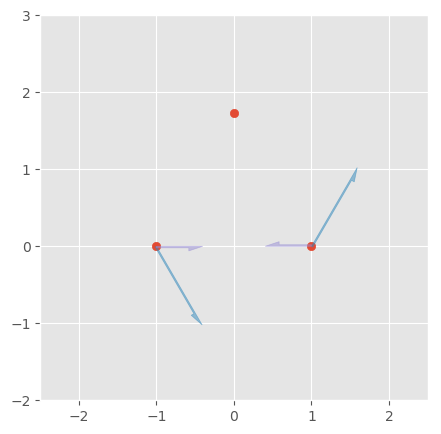

In [3]:
TBP = (
    m = 5e10,
    qs = [
        [-1,  0],
        [ 1,  0], 
        [ 0, √3], 
    ],
    ps = [
        [cos(π/3), -sin(π/3)],
        [cos(π/3),  sin(π/3)],
        [cos(π/1),  sin(π/1)],
    ],
    xlim = [-2.5, 2.5], 
    ylim = [-2.0, 3.0],
    do_addnoise = true,
    noise_level = 0.2,
)

let prob = TBP
    o1, o2, o3 = Particle.(prob.m, prob.qs, prob.ps)
    f1 = forceof(o1, o2)
    f2 = forceof(o2, o1)
    
    ###
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(prob.xlim)
    ax.set_ylim(prob.ylim)
    
    plot!(ax, o1; do_plotvelocity=true)
    plot_force!(ax, o1, f1)
    plot!(ax, o2; do_plotvelocity=true)
    plot_force!(ax, o2, f2)
    plot!(ax, o3)
    
    fig |> display
end

;

In [103]:
traj = 
let prob = TBP, n_steps = 50
    space = Space(Particle.(prob.m, prob.qs, prob.ps))
    sim = DiffEqSimulator(1e-1)
    
    HTML(
        animof(
            space, sim, 2 * n_steps; 
            xlim=prob.xlim, ylim=prob.ylim
        ).to_html5_video()
    ) |> display
    
    @info "" positionof(space) velocityof(space) stateof(space) accelerationof(space)
    
    traj = simulate(space, sim, n_steps)
    
    if prob.do_addnoise
        map(traj) do env
            q, p = positionof(space), velocityof(space)
            reconstruct(
                env, 
                q + prob.noise_level * randn(size(q)), 
                p + prob.noise_level * randn(size(p)),
            )
        end
    else
        traj
    end
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGG121kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAC/VliIQAM//+9uy+BTX9n9CX\nFP/247LlYF5EQfDE9dY4AAADAAADAC4Ui61SxgfLdAAAAwFpAB3Hf4Ha9ADwqbcTShCwRVy+yipy\ng7dr17sj4BQnNdRnxP2nzGCOSUXHJa6ehRyVDP4A864UgdwTyEzw6d6b5/ssiSuyNayOmGyR8hC7\nm5Y/rMbws5j0AYgj2lVlpaZSpF95sAZpIDAnXt6xIzBpe/Mu/S/uWRS7wOMGTcpLdYprntQZxTRG\n2p+vliWYOAYesQyUMS+JmFKycvd2TmsVMDiQ05GKcqDWUdOMZzcnvlPdt8nPTBZVjhbqdOJaFhC0\nLew7kqRqTzOwBChHGfx+tMjYh5ETNpDX4g/WfnJWAqwtKlYTiYNiTCpNen5DAPIkeAYwAAADAAAD\nADkG0e0vTb5KXD/bOQDgu9NtA9iIHp5hxE73C8z0aNFLJYHouGlL5BPAQutXYcj5CtE7UC7hcuQV\nenYUagjbJeukYEXZtlSw/v55Kt0d8diFC5Ohpj5eVVft8y0OTR2/otgPZFOqH94Lg776lXiFSSTb\nQ6jP5hAxC6H3iw6L0SmBWCAmm7kdSeFL9/BggowaWQi4e4ouJZ5y29ipg8BayOjeV0uVMXALIjWk\nW6sixH/tTpJ7RobZXu9wR+3s/NJT4CVZPtrnfC/bB3G0WGBUiHi6huEI4dg23FW5wDNHQQSfnz39\nrnBSH1XSYbzsnhWtrNt7ztvQu5+7zUBDAOcSgCihMRueoCwT0Wumg6Lxv7dZbWkTm8WwXduJiyh1\n3DQZ3jQO0LVu+kMt3FTV4FskidM84sTqS7hakgPoHRuH8bZ571uFFyXIAABXFn6l2O2Wc9rrhsa4\njNYMxDT9oU6ao1spcEvJVIgsKsV0lc7YsG9f/xo/jiKhEMwRR6PN5KPcmAFF7iBZeQic4o6+Vc7w\nFrND5MaAzbpcYT0ciP1T1m/ZQxOY9it8l7pVKGHlk5rHwqCtoCWxpGKb4/G4IJt/Z1+pJLnqDu1J\n/LBun37aQoooVv3qykaF4AYeLnixpekvs27mW2zsASd2s29LA5pA1Dm9zMv1liFOHmV8hlJuXi0E\nwIQNExyr43518n7UkAdfAnNunlyZvY6Yhdq6V5IEAtP5cSAaPb+Yjca//LLq9cxq5Cq1ACD6uJrC\nr6Z3bVJLdIQ9udYnyW7dl1Fp+uVZJ7qd2SMHlmqzdLmNkcyznGJcE3UrBklyeeO0ZZ3g0+ckkIgD\nLxYIcSozBPKEy591BVzMLpQa/RINQcsWmTp7VSNmJV5s6Ju574uaSS4+r+aCoQYmgnwIL+LaIORR\nvEu29g0TOwO6n/W0Nmu9icv/JCVBkQDd6nJCE7rXBSpm0GF+czYrtiu0ZYuSPCCkvRptbraDQ3hG\nfJwgbjIXcCoP4grdbDGmpLT0NGA/jag9hqJ4LwpTbUUFSEyoqHvaziG0F4CD/HxA2pHn3UYQ4An8\nkBz84P5aM+H7isEmkBqF/q7V3xEJCQHUtw1zQQYQLaL6jp2ChMMbhTx80Xmjxcf7AABRg6O/7nKD\nV5Ga7H7dhGrCT/xtWQ1zvhns9phkeotExy/vnyP1lU9CjkQeeMS5yBcsWMdHh7mPdzWnjj1AAAA5\nNN1C9EpVrEo+6e5DScTs8+vZoXaMlUrk82aRk0AC1PiDUhcqpYD2YhFkoqk6eY8oB4K1YAGLc7/l\nLXzQ2Yt0F1x8MloTT/7oFRHx1lm4XN9Q2/D6e2krDEKKBFRIrXzlJeNTURInl9CKrc3v1tdEMtx8\nhJg5oOg/J6nuVrqdYt2x3JOR5kUkbJstC9EmVrTLNaItvYUffyjfzLeVYY3OAsTZRsdCIJwOPwPO\nT7BxhEkVAisgGVQ9I08EHgnCZ4lu/K05FNzLknkxjlo1q25XFEzr7UiJ9iOw217oaMAL265H/fsr\nnOgRu9DXVXJ45/Oko6Kez8yNaBfwSt94PzvXf6kXcx/XuNp7RB2faSfeHkae61d/CAbcxILnX4Hu\n9yZK/cMa7hsGYC9grhbUZNoPH7iisxmfZEt4k362SItC5Do6JPsUfs/VVII0SuLR86VnW6UOHTiR\nd9Vfh+w2ke+OoOwPb2z4e+5tEUxH409SpI7BIwhiH+jCtGL/7lpkKPJTptSmLtXJmX6PTVPqh/A0\n2IlTwbGw1nu8A8nUIIZX/MbHZKMC6RZmkZnVNhfg1C8Ug1fT4kE4MVX8kPuDifMsBRApVabOTV9t\noUBYU01VgTfFI0w2XeYKrqAcDELXvPr40FQ1PREifnwH1h6xLEPid9cKIMrlmQNSS48cciUW8y7v\nuRDD+50UsxIDU+NyiMHTIzDyCMlIVAtfLVj3JbsAx/bnKGrwGnrhsr2fA2d7lWbg4Og5MEk/0q6i\ni8avIIKxV2ewaQ1/8hG2j0beYkgWMy1K3VpjEFJeo+Wuf9gWDrcp+rk9MKUMH7mKUI8kgfD1cjdm\nLmLP//ufDB14KJvLPK8MmdpRpY296cmm3IvhnJ50oRT2Wurn4kF/2f4obR0hOqWReS9unXjn+66s\neRrhD7LvBTHrxIXWiQIAzXl99KI0IbuK9XrCzOMSSPqD58aWWbJme8LyuklDGri+Eh8rjMlgjDEf\nkO19PhuAcSGPvPBihGAAJzHHFlCd8BvQlJiwBYvTfale/Kx/+10Phttg0ME6TyvQLZNju3hdr+2M\n6JxEiuhmq6pRIEjWdZJkO+U7McPsvGI9qGD00cOUG1p1BnAnn9JxngmuHC/A/2+bfE5k1OfoQfeq\n9jBY2Rpz/QmrYtFmyB6iC3jgKRcsadCraTOdeArKRlJlZq

┌ Info: 
│   positionof(space) = [-1.0, 0.0, 1.0, 0.0, 0.0, 1.7320508075688772]
│   velocityof(space) = [0.5000000000000001, -0.8660254037844386, 0.5000000000000001, 0.8660254037844386, -1.0, 1.2246467991473532e-16]
│   stateof(space) = 12-element LabelledArrays.LArray{Float64,1,Array{Float64,1},(q = 1:6, p = 7:12)}:
 :q => -1.0                  
 :q => 0.0                   
 :q => 1.0                   
 :q => 0.0                   
 :q => 0.0                   
 :q => 1.7320508075688772    
 :p => 0.5000000000000001    
 :p => -0.8660254037844386   
 :p => 0.5000000000000001    
 :p => 0.8660254037844386    
 :p => -1.0                  
 :p => 1.2246467991473532e-16
│   accelerationof(space) = [1.2514312500000002, 0.72251416905981, -1.2514312500000002, 0.72251416905981, 0.0, -1.44502833811962]
└ @ Main In[103]:13


In [ ]:
using BNP2: _tolist

@model three_body(states) = begin
    m = 5e10
    u ~ MvNormal(zeros(12), 5)
    q, p = u[1:6], u[7:12]
    space = Space(Particle.(m, _tolist(q), _tolist(p)))
    for i in 1:length(states)
        space′ = transition(space, 1e-1)
        states[i] ~ MvNormal(stateof(space′), 5e-1)
        space = space′
    end
end

mf = three_body(stateof.(traj))

@time chn = sample(mf, NUTS(100, 0.65), 500)

chn |> display

# let prob = TBP
#     bson("three_body-noise=$(prob.do_addnoise).bson", chn = chn)
# end

;

In [110]:
q̄s = 
let n_skips = 200, U = hcat(get(chn[n_skips+1:end], [:u]).u...)', n_steps = 50, do_map = false
    m = 5e10
    do_map && (U = mean(U; dims=2))
    q̄s = zeros(6, n_steps)
    for i in 1:size(U, 2)
        u = U[:,i]
        q, p = u[1:6], u[7:12]
        space = Space(Particle.(m, _tolist(q), _tolist(p)))
        traj = simulate(space, 1e-1, n_steps)
        q̄s = q̄s + hcat(positionof.(traj)...)
    end
    q̄s / size(U, 2)
end

;

In [111]:
using BNP2: TwoDimPath, animation

let prob = TBP, q̄s = q̄s
    @unpack xlim, ylim = prob
    HTML(
        animof(
            q̄s; xlim=prob.xlim, ylim=prob.ylim
        ).to_html5_video()
    ) |> display
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAvI21kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACAlliIQAO//+906/AptFl2oD\nklcK9sqkJlm5UmsB8qYAAAMAAAMABMhfhdYZyUpNhAAAHeAB6sP8DtfwAtoUKjg4fHnepbxGR5h+\nIqb8+GGAUJzpjowmdKO6XM4q/NniUV+SA3wS1AedcKQO4J5DssvbAV8/2WRJXbZ5LCnDZI+QhdzW\n3/yLZIqWpKofzFKs+IoAB62BdVvLaWeIBfH7wQsglPJ2t+BfnrARVDL/JfNsyLM/ObIoK/1xSyWs\n3FoB2ZHbpeQGWIh754U44r+iuV1H0UoW5quqgLLSAMVUM9xx/H5bA0iiYTzWUWlJvmaF7EXuoQtC\n3sjOVwwwduUMu8JB0Y4rTXb9SMMqrxz4fxTRJEZxXEJVnO89RSB3uqbbiiGdJDtLY4yCWgAnC4bU\ngAB6aqNMAYltFiB20qQWWLp5KXD/bOQDgu9NtVYiIHp5hxE73DAz0aNFLJYHouGlNBBPAQutf3W1\nRJDrL/4c1snaBbjYUagjbJeunPQXZtlSw/v58Kr0d8diFC5OhsVReVVft8y0OTR6W4Uw3clc9iUu\nLjw76iuiFSXbb26jP5hAxC6H3islx0SmWWQ8mm7kdSeFv+TUYjcWuuZVM9K0heHEawVOChRhNJKp\n906wIcHowCoOK+bTfeZ9iEqiOitsiMc/6zuoFHHVUIjNH5w922e32JIqYRRi1JeOL8QUkQ8AAAMA\nAHv0B5zQp3O+VIPO1kr2sVLvSbNU6+3f6vi/z/8CN99u+vTcgbdCldSRep83tz+HDlRDDrGUjOXX\n8lJzP2iJPPlFA6/XzHetIexiGq8DsbbHPuv+ZfCs4FcpNgrYrjF34T82P1vENtVt5GbyjvGjSGW7\ne52AEvAA/HhPI1K0rH3x8/YbsybCCyNLDlgHOrpUz+Y8gFd0G85GPC5adOR9gxy2UHkUjPo41HpL\nP6c0BITuebjkLxIgK1dPFrQ/v/e5Bshs/+XqiZP5MXPBJoVDh+Vyyy/LQt+3zPnqvPog4+zoRA0p\nNHlVHhYmKP9srPIcj1vdO7y0jZPrlghQtQ7vhLqDJEuc/ES+YhFtK+AwLQtHRTdjFJuuq1dJ6fXV\nJGl0eGjl+2Abv1DnMUxrHHXCEBEtpAdipHBhUOlk1wvPdkorPAzSfYAlZjq8Xa4RHF9pYj/IANXK\nruo+fwEP9mV8xUhIsPjSa6yvh8NqZVkm7XHccRz3Pszszxx1i6Z9+xvBvXRNu9ioN7W7Gicfwh1n\nFjV/hXi5Cw+LUl77rQdwsNGvBRTJiuknaFgnXpTTeou4eXVXgj1i0/4SBAZ/OJ+z6A552jFykqJA\nyTWMWLBV+CCVxxF6iDDKogClh/RHbzDSQop+kwE+4hCF03ebuKwIa+2J+2QQDDKFvDKlwb9vWPqQ\nqf9FwyJZOd1UjQ0befRFh2KGTaw9oinQqbLzdrHM37Gqe00Aq9ijm2ES8WUwAAFNHLOKRBZLgFJR\nXGUneeGobdZmAAADAAAE9uwapz4mw/u0O+T4xiqkzVMaKsfqUCXSKr4J6xznUG8VIv3R0f+5akuM\nGDBXa/8VvBM7e7HjSbzVaQ+nTv5gOm0CgoJVs7Iuqn14TrXqU3Uhpxn7eXt4uda6gRGjKRqDDBYv\n+HJYKk9UIkrcZYEoZhTr/ejtcg8Xv7pXmONcMyz/VpbyuhIT8wM6fBD8iVt71nMzh6yA0Abf+fui\nMviLC0Mz+X/k2JcjIsnPq84pGGRaYqwl7hGdjzhL2qcI1qszPxwsAAAPSuGsFUZTKodApTFEajGf\nZ8RSwdGRcL1oWfUJ1Du2GbfT+CQqm6rE05I9gtBy9YBzDmyHUl3CLPZBKcbWc3vTj1C60/mrXEgt\nm7NoIEVeW9q1N4cIkFR0iCXqNg6xgFUYEsj/aEiDCVmowCNLdxal+5RLgmkSjyPyZRgYggC3PWCn\n6Dqf9fWPRXof1yVoiUm4jX6v7QeP5cWWxmUNYrgEdejmhXT6XPTBOJPkicNLooT64ooLfomMARt0\njeUP2C4k9CzXehZ4UcbZKw7nAGQ2nrVWS1uzn54b6p+uCZYsCagkoWDji+cZM26f7TiXjAtx6FVk\ndd31Bs4ASVeERR5WygROMvxKw5aWublodTXQi6IkbARcwvxDtLtrcQ+jWBcEbKS/pKeS+55TDqSx\niKG2mjvfJKQmjk8B3JurqyN2IdPu32K4e1cf7xXUM1LRzXn1vjVLmWfuYRXqxIl9m+9OK4e0p+px\noTU++ynfuIS/lY1D/tFnm73YT3m2yNT/xaVlmSsE0xJ623br7lx6ST9n3xlXzoqRAthEwEmqiojU\nSbjJ31SVHPkx1obEjPMVtqoA0cTisfEltbVEWvuyyCk0P/mruHrSN1R9hboIio6HYa93cT64GbpP\nnohrG8Stj+LsDd3DnUnKUtwgY6mPjVhbvgrtmxU+qMZEa46hgazsuC8Ai9+y1B8sS4wL7wRiRHpc\nIMvn96MrpkYOWF1uIDAH4AAQkGPSObN6h5bJ/VFA0iYs8S30PEBfvfNOGCmYKi9uiU4MR66QW9f5\nV0dlhTx8sqAAFqfFOPpVyK7WzT9DGqmn3EAP33q/8lGxL5ZZlNZwO6xLa4ADk3Bz6o1kIVpCshrh\nZmZ7lr7RWMCzCX2CCkn/y12xoJrnCKs6PPLhyh3EkNiuvyopq25GzF3pbAyZc9ZxeHQ2aqsT7cGQ\nRVbqJMVkRM3CGjteq8D+vQZ9xmvwf+MncRtHr/N/0JVtbC+Monq814+AAAAGJQAAAT5BmiJsQ7/+\nqZYAPQwLQT7Bl2HE8bYyWoa5Uz+hYKlewnNgp1ZMpkCvUO